<a href="https://colab.research.google.com/github/vishnudk/liver-disease-classifier/blob/master/liver_clas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
liver_data=pd.read_csv("indian_liver_patient.csv")
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
liver_data.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [8]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [10]:
liver_data.Albumin_and_Globulin_Ratio.head()

0    0.90
1    0.74
2    0.89
3    1.00
4    0.40
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [11]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
liver_data['Gender']=liver_data.Gender.replace('Female',0)
liver_data['Gender']=liver_data.Gender.replace('Male',1)

In [15]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [350]:
liver_data['Dataset'].value_counts(normalize=True)

1    0.713551
2    0.286449
Name: Dataset, dtype: float64

In [52]:
liver_data['Albumin_and_Globulin_Ratio']=liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data.Albumin_and_Globulin_Ratio.mean())
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [0]:
liver_data['total_direct_bilirubin'] = liver_data['Total_Bilirubin'].astype(str) + "_"  + liver_data['Direct_Bilirubin'].astype(str)
lb = LabelEncoder()
liver_data['total_direct_bilirubin'] = lb.fit_transform(liver_data['total_direct_bilirubin']) 

In [0]:
x=liver_data.drop(['Dataset'],axis=1)
y=liver_data['Dataset']

In [363]:
x.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,total_direct_bilirubin
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,4
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,66
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,196
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,16
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,159


In [364]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [365]:
y.value_counts(normalize=True)

1    0.713551
2    0.286449
Name: Dataset, dtype: float64

In [0]:
sm = SMOTE(random_state=2019)
x,y = sm.fit_resample(x,y)

In [0]:
cols = list(liver_data.columns)
cols.remove('Dataset')
x = pd.DataFrame(x,columns=cols)
y = pd.DataFrame(y,columns=['Dataset'])

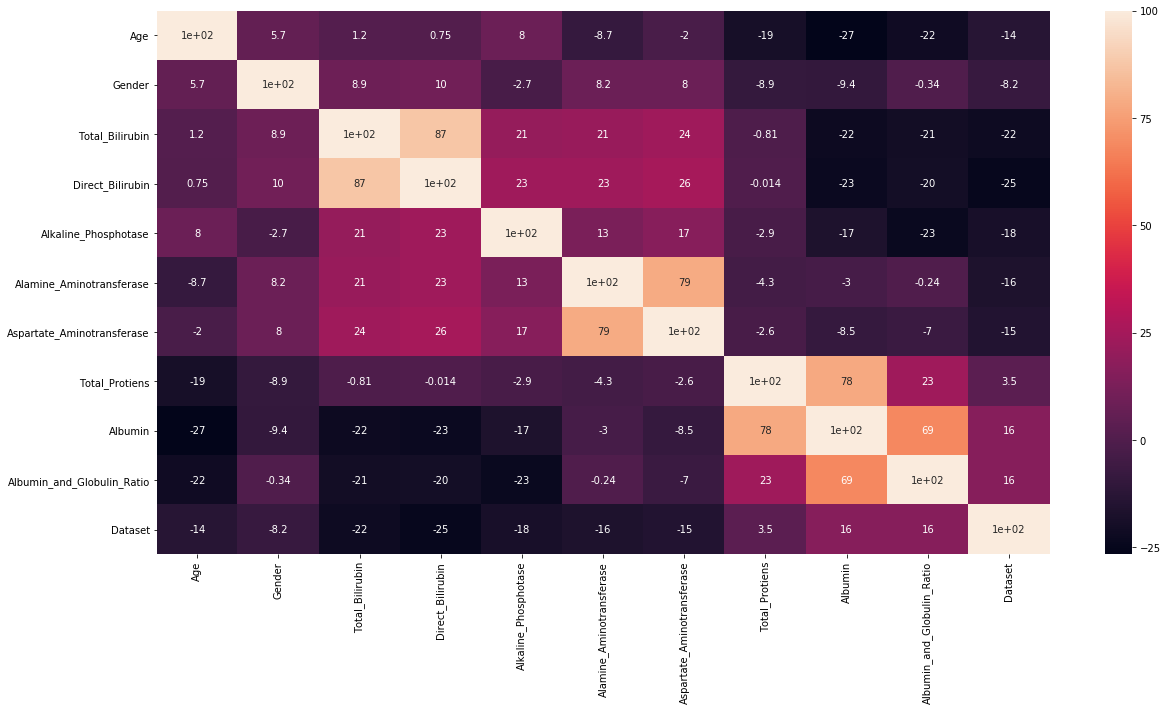

In [354]:
corr = liver_data.corr()
plt.figure(figsize=(20,10))
corr = corr*100
sns.heatmap(corr,annot=True,color='white')

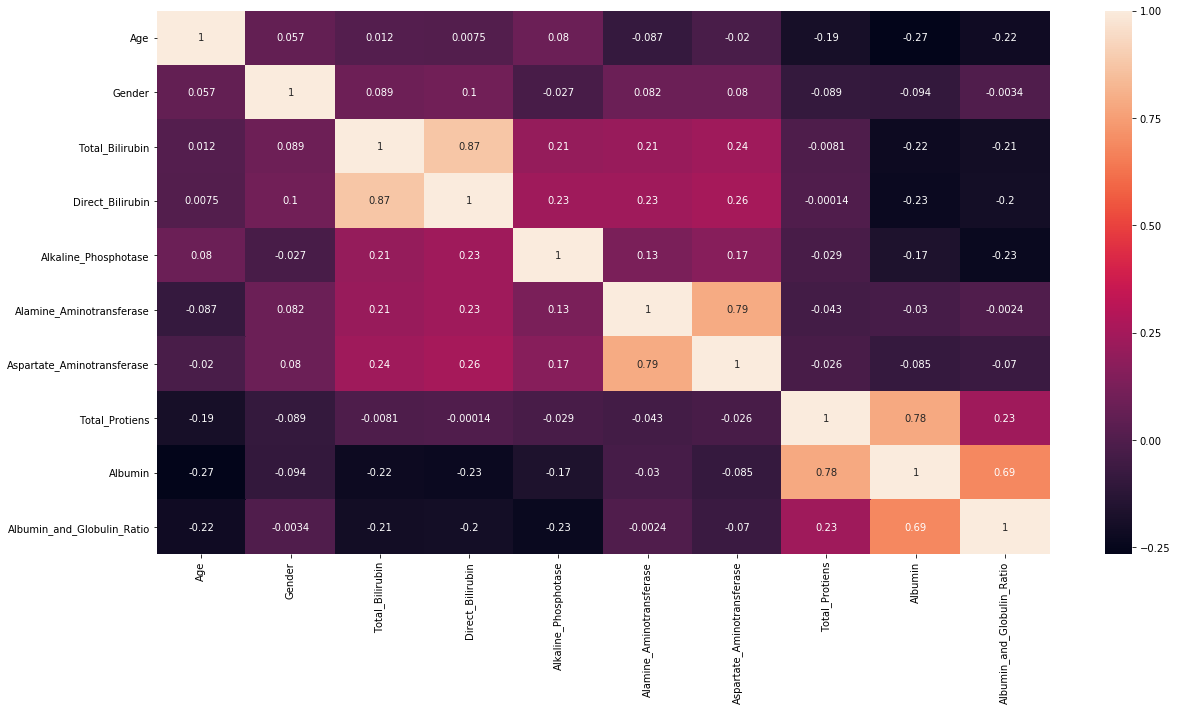

In [57]:
corr = x.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,color='white')

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7989,random_state=7)

In [590]:
x_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,total_direct_bilirubin
740,43.963527,0.629559,0.862956,0.200000,164.925151,20.888678,16.888678,6.285220,3.222264,1.011132,8.888678
795,56.355922,1.000000,1.000000,0.300000,192.152622,20.932233,26.220389,5.586447,2.706777,0.942369,15.000000
595,32.841615,1.000000,1.584162,0.496040,164.802019,15.197981,22.960404,7.256444,3.480202,0.919208,41.287269
727,29.992273,0.007727,0.803091,0.201545,158.015454,24.961366,22.000000,7.886865,4.488410,1.296909,7.131355
667,28.087940,1.000000,0.617588,0.200000,158.736179,14.736179,15.912060,6.982412,3.517588,1.008794,3.351762


In [591]:
liver_data['Age'].max()

90

In [0]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(n_neighbors=5)

In [593]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [594]:
predict=model.predict(x_test)
predict

array([2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2])

In [595]:
from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(predict,y_test))

0.8214285714285714
